In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv('Sleepdata.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Data Preprocessing

In [3]:
#checking for missing values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [4]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [5]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [6]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [10]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


EDA

In [14]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame containing the data

# Create a 3x3 grid of subplots
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("Gender Count", "Age Histogram", "Sleep Duration Histogram",
                    "Quality of Sleep Count", "Physical Activity Level Histogram", "Stress Level Count",
                    "BMI Category Count", "Daily Steps Histogram", "Sleep Disorder Count")
)

# Define a function to add white borders to histograms
def add_white_border(fig, trace, row, col):
    trace.update(marker=dict(line=dict(color="white", width=2)))  # White border with width of 2px
    fig.add_trace(trace, row=row, col=col)

# Gender Countplot
gender_count = px.histogram(df, x='Gender')
add_white_border(fig, gender_count['data'][0], row=1, col=1)

# Age Histogram
age_hist = px.histogram(df, x='Age', nbins=10)
add_white_border(fig, age_hist['data'][0], row=1, col=2)

# Sleep Duration Histogram
sleep_duration_hist = px.histogram(df, x='Sleep Duration', nbins=10)
add_white_border(fig, sleep_duration_hist['data'][0], row=1, col=3)

# Quality of Sleep Countplot
quality_sleep_count = px.histogram(df, x='Quality of Sleep')
add_white_border(fig, quality_sleep_count['data'][0], row=2, col=1)

# Physical Activity Level Histogram
physical_activity_hist = px.histogram(df, x='Physical Activity Level', nbins=10)
add_white_border(fig, physical_activity_hist['data'][0], row=2, col=2)

# Stress Level Countplot
stress_level_count = px.histogram(df, x='Stress Level')
add_white_border(fig, stress_level_count['data'][0], row=2, col=3)

# BMI Category Countplot
bmi_category_count = px.histogram(df, x='BMI Category')
add_white_border(fig, bmi_category_count['data'][0], row=3, col=1)

# Daily Steps Histogram
daily_steps_hist = px.histogram(df, x='Daily Steps', nbins=10)
add_white_border(fig, daily_steps_hist['data'][0], row=3, col=2)

# Sleep Disorder Countplot
sleep_disorder_count = px.histogram(df, x='Sleep Disorder')
add_white_border(fig, sleep_disorder_count['data'][0], row=3, col=3)

# Update layout for better visualization
fig.update_layout(
    height=800, width=1000,
    title_text="Data Analysis Plots with White Borders",
    showlegend=False
)

# Show the figure
fig.show()


In [16]:
import plotly.express as px

# Plotly version of Gender count plot with Sleep Disorder as the color (hue in Seaborn)
gender_count_plot = px.histogram(df, x='Gender', color='Sleep Disorder',
                                 barmode='group',  # This makes the bars side by side (similar to Seaborn's behavior)
                                 color_discrete_sequence=px.colors.qualitative.Dark24)  # Use an appropriate qualitative color scale, e.g., 'Dark24'

# Add title
gender_count_plot.update_layout(title="Gender and Sleep Disorder")

# Show the figure
gender_count_plot.show()

In [18]:
# Plotly version of Occupation count plot with Sleep Disorder as the color (hue in Seaborn)
occupation_count_plot = px.histogram(df, x='Occupation', color='Sleep Disorder',
                                     barmode='group',  # Group bars similar to hue functionality in Seaborn
                                     color_discrete_sequence=px.colors.qualitative.Plotly)  # Default Plotly color sequence

# Rotate x-axis labels and update layout
occupation_count_plot.update_layout(
    title="Occupation and Sleep Disorder",
    xaxis={'tickangle': 90},  # Rotate x-axis labels 90 degrees
    xaxis_title="Occupation",  # Add x-axis title
    yaxis_title="Count"        # Add y-axis title
)

# Show the plot
occupation_count_plot.show()

In [19]:
# Plotly version of BMI Category count plot with Sleep Disorder as the color (hue in Seaborn)
bmi_category_plot = px.histogram(df, x='BMI Category', color='Sleep Disorder',
                                 barmode='group',  # Group bars like hue functionality in Seaborn
                                 color_discrete_sequence=px.colors.qualitative.Set1)  # Equivalent to 'Set1' palette

# Add title and update layout
bmi_category_plot.update_layout(
    title="BMI Category and Sleep Disorder",
    xaxis_title="BMI Category",
    yaxis_title="Count"
)

# Show the plot
bmi_category_plot.show()

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [21]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


<Axes: >

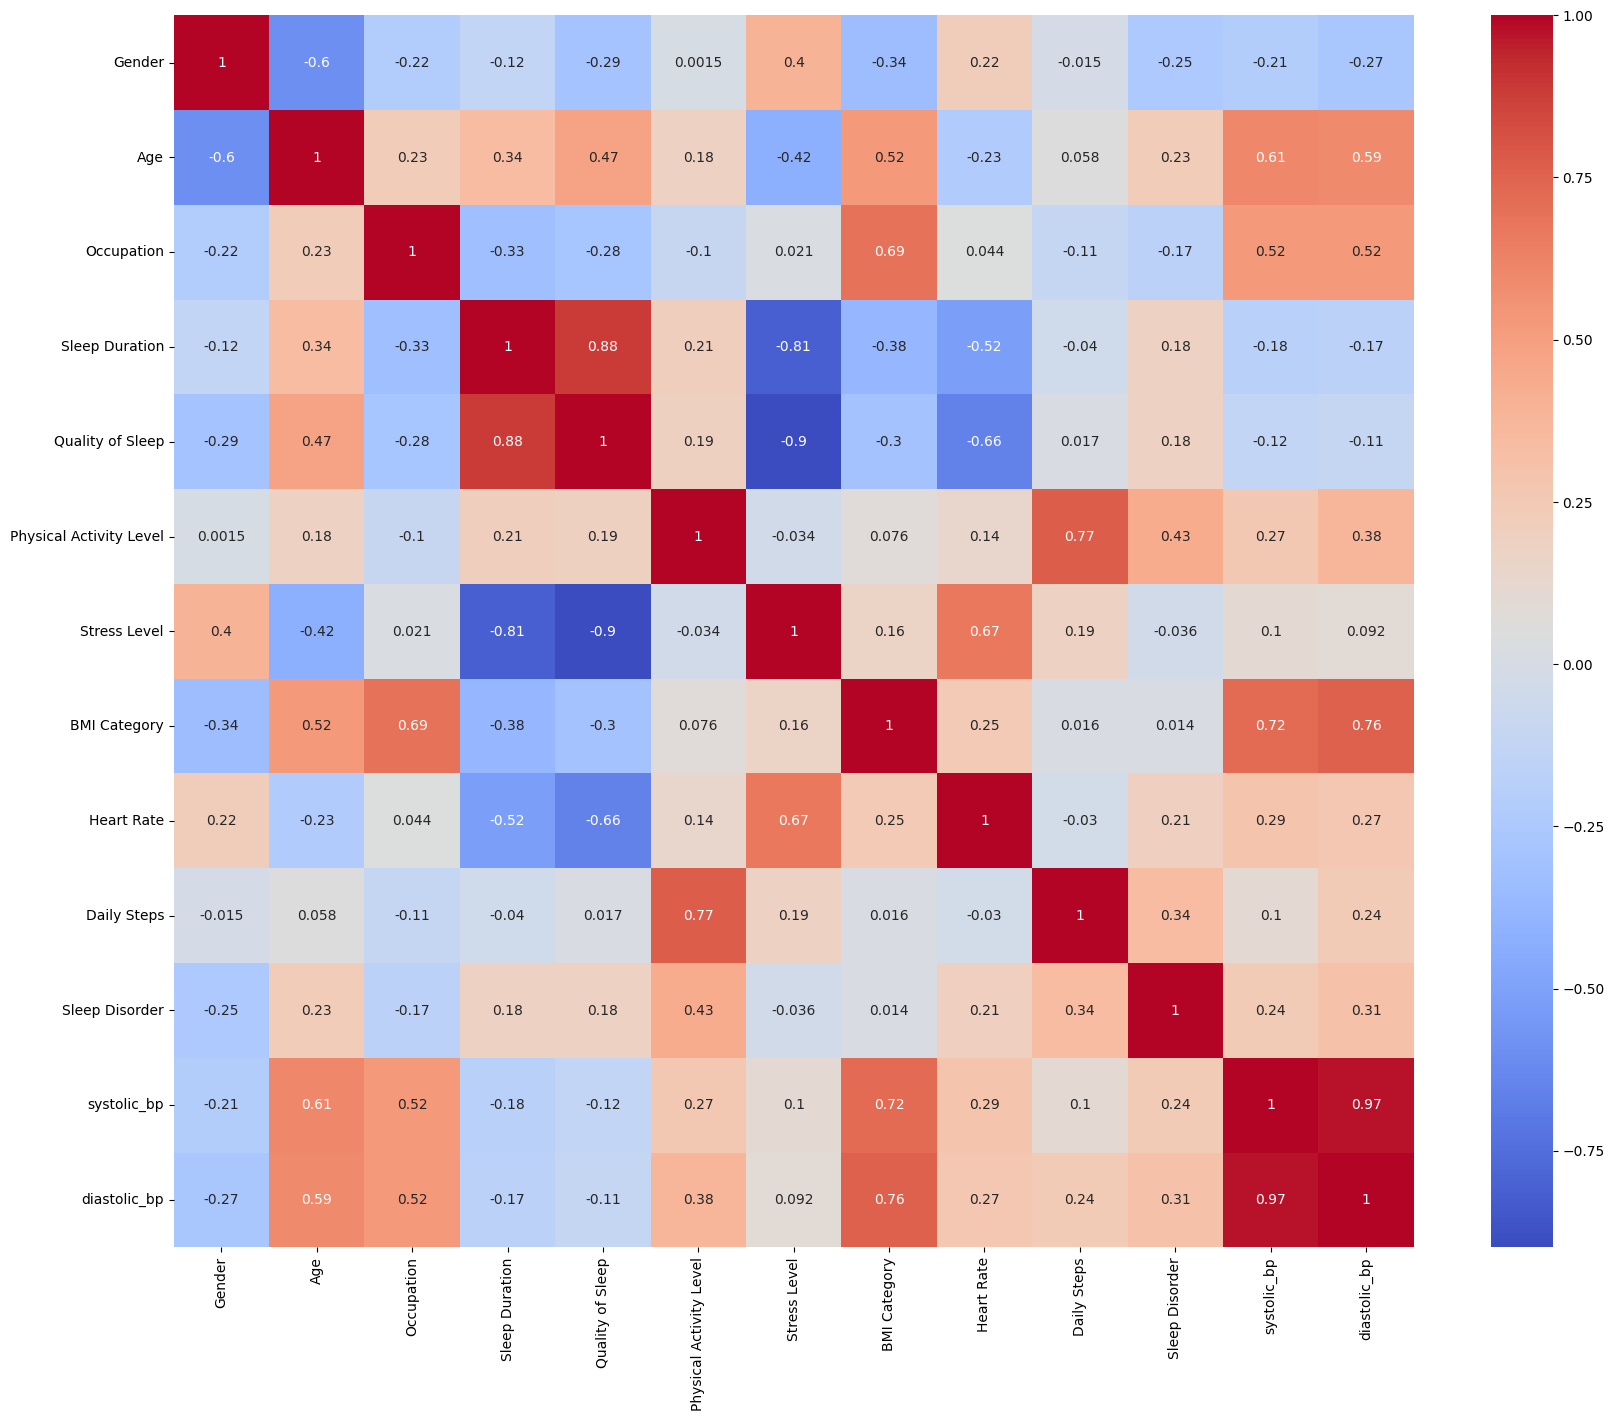

In [22]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

Train & Testing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

**Model Building**


1.   Decision Tree Classifier
2.   Random Forest Classifier



In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [25]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


In [27]:
d_pred = dtree.predict(X_test)
d_pred


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

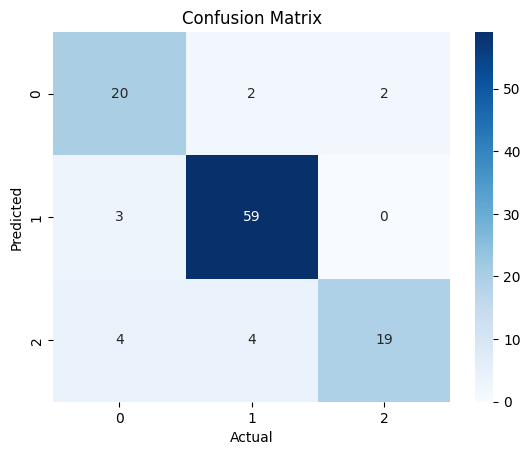

In [28]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

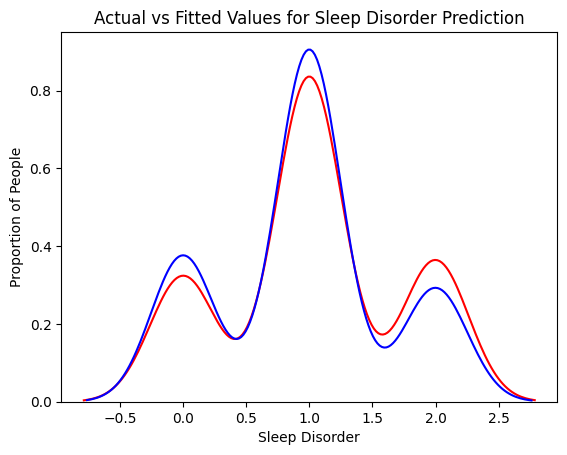

In [29]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.91      0.95      0.93        62
           2       0.90      0.70      0.79        27

    accuracy                           0.87       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113



Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9348659003831418


In [34]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

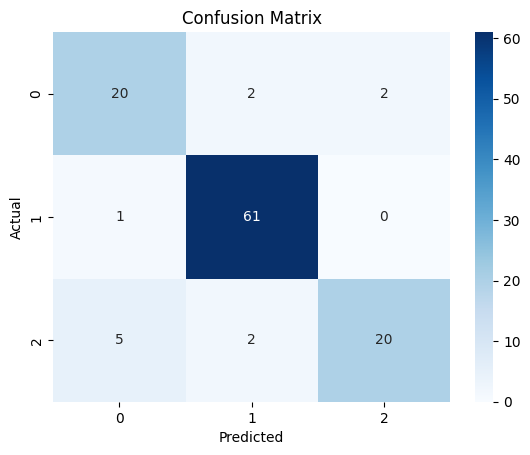

In [35]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

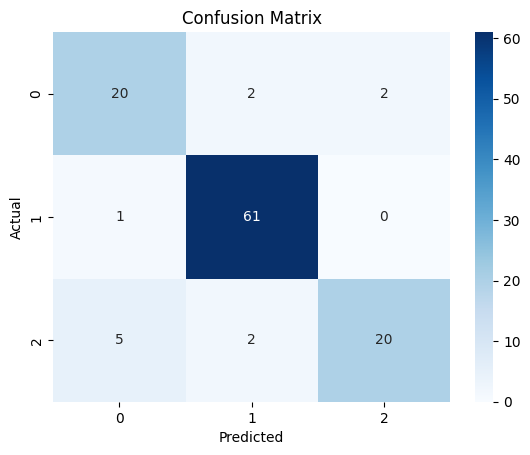

In [36]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
print(classification_report(y_test, rfc_pred))



              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('Sleepdata.csv')

# Preprocessing
# Initialize label encoders for each categorical feature
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_bmi_category = LabelEncoder()
le_quality_of_sleep = LabelEncoder()
le_physical_activity_level = LabelEncoder()
le_stress_level = LabelEncoder()
le_sleep_disorder = LabelEncoder()

# Fit the encoders to the training data
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Occupation'] = le_occupation.fit_transform(df['Occupation'])
df['BMI Category'] = le_bmi_category.fit_transform(df['BMI Category'])
df['Quality of Sleep'] = le_quality_of_sleep.fit_transform(df['Quality of Sleep'])
df['Physical Activity Level'] = le_physical_activity_level.fit_transform(df['Physical Activity Level'])
df['Stress Level'] = le_stress_level.fit_transform(df['Stress Level'])
df['Sleep Disorder'] = le_sleep_disorder.fit_transform(df['Sleep Disorder'].fillna('None'))  # Replace NaN with 'None'

# Handle 'Blood Pressure' column
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop('Blood Pressure', axis=1, inplace=True)  # Remove the original column

# Update feature selection to include new columns
features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'BMI Category',
            'Systolic', 'Diastolic', 'Heart Rate', 'Daily Steps']

X = df[features]  # Independent variables
y = df['Sleep Disorder']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Save the trained model and encoders for future use
joblib.dump(rf_model, 'random_forest_sleep_disorder_model.pkl')
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_occupation, 'le_occupation.pkl')
joblib.dump(le_bmi_category, 'le_bmi_category.pkl')
joblib.dump(le_quality_of_sleep, 'le_quality_of_sleep.pkl')
joblib.dump(le_physical_activity_level, 'le_physical_activity_level.pkl')
joblib.dump(le_stress_level, 'le_stress_level.pkl')
joblib.dump(le_sleep_disorder, 'le_sleep_disorder.pkl')

# Function to predict sleep disorder based on user input
def predict_sleep_disorder(Gender, Age, Occupation, Sleep_Duration, Quality_of_Sleep,
                           Physical_Activity_Level, Stress_Level, BMI_Category,
                           Systolic, Diastolic, Heart_Rate, Daily_Steps):

    # Load the saved label encoders
    le_gender = joblib.load('le_gender.pkl')
    le_occupation = joblib.load('le_occupation.pkl')
    le_bmi_category = joblib.load('le_bmi_category.pkl')
    le_quality_of_sleep = joblib.load('le_quality_of_sleep.pkl')
    le_physical_activity_level = joblib.load('le_physical_activity_level.pkl')
    le_stress_level = joblib.load('le_stress_level.pkl')
    le_sleep_disorder = joblib.load('le_sleep_disorder.pkl')

    # Convert categorical inputs using the same LabelEncoders
    try:
        Gender = le_gender.transform([Gender])[0]
        Occupation = le_occupation.transform([Occupation])[0]
        BMI_Category = le_bmi_category.transform([BMI_Category])[0]
        Quality_of_Sleep = le_quality_of_sleep.transform([Quality_of_Sleep])[0]
        Physical_Activity_Level = le_physical_activity_level.transform([Physical_Activity_Level])[0]
        Stress_Level = le_stress_level.transform([Stress_Level])[0]
    except ValueError as e:
        print(f"Error: {e}")
        return "Invalid category value provided for one of the inputs. Please ensure all inputs match the training data."

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'Gender': [Gender],
        'Age': [Age],
        'Occupation': [Occupation],
        'Sleep Duration': [Sleep_Duration],
        'Quality of Sleep': [Quality_of_Sleep],
        'Physical Activity Level': [Physical_Activity_Level],
        'Stress Level': [Stress_Level],
        'BMI Category': [BMI_Category],
        'Systolic': [Systolic],
        'Diastolic': [Diastolic],
        'Heart Rate': [Heart_Rate],
        'Daily Steps': [Daily_Steps]
    })

    # Load the saved model
    loaded_model = joblib.load('random_forest_sleep_disorder_model.pkl')

    # Predict the sleep disorder
    prediction = loaded_model.predict(input_data)

    # Decode the prediction to its original label
    prediction_label = le_sleep_disorder.inverse_transform(prediction)

    # Handle NaN predictions and replace with 'None'
    if prediction_label[0] is None or pd.isna(prediction_label[0]):
        return 'None'

    return prediction_label[0]

# Example usage of the prediction function
result = predict_sleep_disorder(
    Gender='Male', Age=29, Occupation='Teacher', Sleep_Duration=6.3,
    Quality_of_Sleep=6,  # Use a numeric value here
    Physical_Activity_Level=40, Stress_Level=7,
    BMI_Category='Obese', Systolic=140, Diastolic=90, Heart_Rate=82, Daily_Steps=3500
)

print(f"Predicted Sleep Disorder: {result}")


Model accuracy: 88.00%
Predicted Sleep Disorder: Insomnia


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Random Forest
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Use the best model found
best_rf_model = random_search.best_estimator_

# Predict on the test set and calculate accuracy
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Optimized Model accuracy: 88.00%


In [78]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=500, learning_rate=0.05, max_depth=10)
xgb_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model accuracy: {accuracy_xgb * 100:.2f}%")


XGBoost Model accuracy: 89.33%


In [79]:
import lightgbm as lgb

# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=500, learning_rate=0.05, max_depth=10)
lgb_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Model accuracy: {accuracy_lgb * 100:.2f}%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [80]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [83]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': np.arange(5, 50, 5),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(100, 1000, 100),
    'min_child_samples': np.arange(10, 100, 10),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions=param_grid,
    n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Use the best estimator
best_lgb_model = random_search.best_estimator_

# Predict and calculate accuracy
y_pred_lgb = best_lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Optimized LightGBM Model accuracy: {accuracy_lgb * 100:.2f}%")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

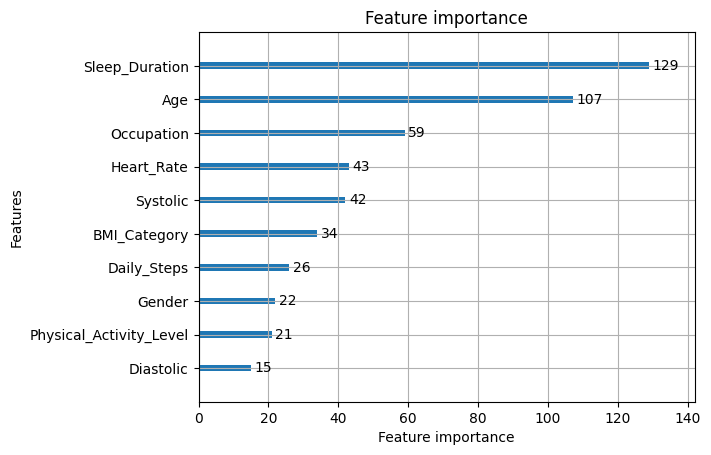

In [86]:
import matplotlib.pyplot as plt

# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split')
plt.show()


In [102]:
import lightgbm as lgb

# Define the early stopping callback
early_stopping_callback = lgb.early_stopping(stopping_rounds=50, verbose=True)

# Train with early stopping using the callback
lgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    callbacks=[early_stopping_callback]  # Pass the callback here
)

# Predict and calculate accuracy
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Model with early stopping accuracy: {accuracy_lgb * 100:.2f}%")

# Example usage of the prediction function
result = predict_sleep_disorder(
    Gender='Male', Age=29, Occupation='Teacher', Sleep_Duration=6.3,
    Quality_of_Sleep=6,  # Use a numeric value here
    Physical_Activity_Level=40, Stress_Level=7,
    BMI_Category='Obese', Systolic=140, Diastolic=90, Heart_Rate=82, Daily_Steps=3500
)

print(f"Predicted Sleep Disorder: {result}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits wit